In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
link = "https://raw.githubusercontent.com/Wild-Satellite/Datathon/main/CSV/SatForML.csv"
link2 = "https://raw.githubusercontent.com/Wild-Satellite/Datathon/main/CSV/SatForPredict.csv"

In [3]:
ML = pd.read_csv(link , index_col=0)
SatReentryPred = pd.read_csv(link2 , index_col=0)

In [4]:
ML.head()

,LDate,Span,Perigee,Inc,mass(kg),length(m),height(m),depth(m),Days,OwnerF,StateF,ManufacturerF,BusF,OpOrbitF,shapeF,DateN
0,1961-04-08,0.8,202.0,81.94,148.66,0.90,0.60,0.90,410.000000,0,0,0,0,0,0,910.0
1,1961-04-12,6.5,168.0,64.95,4682.85,2.40,4.30,4.30,0.324306,1,1,1,1,1,1,914.0
4,1961-06-16,1.3,223.0,82.11,941.53,1.52,7.61,7.61,26.000000,0,0,3,3,1,3,979.0
5,1958-10-11,1.0,-870.0,35.89,22.99,0.74,0.76,0.76,2.198611,3,0,4,4,2,0,0.0
8,1959-03-03,0.6,-45.0,29.00,6.03,0.23,0.51,0.51,0.704167,4,0,5,5,3,0,143.0


In [5]:
ML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2809 entries, 0 to 17998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LDate          2809 non-null   object 
 1   Span           2809 non-null   float64
 2   Perigee        2809 non-null   float64
 3   Inc            2809 non-null   float64
 4   mass(kg)       2809 non-null   float64
 5   length(m)      2809 non-null   float64
 6   height(m)      2809 non-null   float64
 7   depth(m)       2809 non-null   float64
 8   Days           2809 non-null   float64
 9   OwnerF         2809 non-null   int64  
 10  StateF         2809 non-null   int64  
 11  ManufacturerF  2809 non-null   int64  
 12  BusF           2809 non-null   int64  
 13  OpOrbitF       2809 non-null   int64  
 14  shapeF         2809 non-null   int64  
 15  DateN          2809 non-null   float64
dtypes: float64(9), int64(6), object(1)
memory usage: 373.1+ KB


In [6]:
X = ML.iloc[:,[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14]].values
y = ML['Days']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=16)

In [7]:
SatReentryPred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9868 entries, 0 to 18056
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           9863 non-null   object 
 1   LDate          9863 non-null   object 
 2   Span           9863 non-null   float64
 3   Perigee        9707 non-null   float64
 4   Apogee         9713 non-null   float64
 5   Inc            9751 non-null   float64
 6   cospar id      9864 non-null   object 
 7   mass(kg)       9851 non-null   float64
 8   length(m)      9868 non-null   float64
 9   height(m)      9868 non-null   float64
 10  depth(m)       9868 non-null   float64
 11  Unused         9868 non-null   bool   
 12  Days           2842 non-null   float64
 13  OwnerF         9868 non-null   int64  
 14  StateF         9868 non-null   int64  
 15  ManufacturerF  9868 non-null   int64  
 16  BusF           9868 non-null   int64  
 17  OpOrbitF       9868 non-null   int64  
 18  shapeF 

In [8]:
XGBRD = XGBRegressor(
    max_depth=5,
    gamma=0.01,
    learning_rate = 0.15,
    objective='reg:gamma',
    n_estimators=100,
    min_child_weight=50,
    subsample=0.9,
    silent=False
)
XGBRD.fit(X_train, y_train)
XGBRD.fit(X_train, y_train, eval_metric='mae', eval_set=[(X_test, y_test)], verbose=True)
print('MAE train', mean_absolute_error(y_train, XGBRD.predict(X_train)))
print('MAE test', mean_absolute_error(y_test, XGBRD.predict(X_test)))
print('R2 train', r2_score(y_train, XGBRD.predict(X_train)))
print('R2 test', r2_score(y_test, XGBRD.predict(X_test)))

[0]	validation_0-mae:1149.57
[1]	validation_0-mae:1149.48
[2]	validation_0-mae:1149.38
[3]	validation_0-mae:1149.25
[4]	validation_0-mae:1149.14
[5]	validation_0-mae:1148.95
[6]	validation_0-mae:1148.8
[7]	validation_0-mae:1148.6
[8]	validation_0-mae:1148.4
[9]	validation_0-mae:1148.15
[10]	validation_0-mae:1147.9
[11]	validation_0-mae:1147.6
[12]	validation_0-mae:1147.26
[13]	validation_0-mae:1146.89
[14]	validation_0-mae:1146.45
[15]	validation_0-mae:1145.97
[16]	validation_0-mae:1145.42
[17]	validation_0-mae:1144.79
[18]	validation_0-mae:1144.07
[19]	validation_0-mae:1143.22
[20]	validation_0-mae:1142.25
[21]	validation_0-mae:1141.13
[22]	validation_0-mae:1139.89
[23]	validation_0-mae:1138.47
[24]	validation_0-mae:1136.83
[25]	validation_0-mae:1135
[26]	validation_0-mae:1132.98
[27]	validation_0-mae:1130.7
[28]	validation_0-mae:1128.09
[29]	validation_0-mae:1125.17
[30]	validation_0-mae:1121.8
[31]	validation_0-mae:1117.93
[32]	validation_0-mae:1113.67
[33]	validation_0-mae:1108.88


In [9]:
SatReentryPred['pred'] = 0 

In [10]:
SatReentryPred.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9868 entries, 0 to 18056
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           9863 non-null   object 
 1   LDate          9863 non-null   object 
 2   Span           9863 non-null   float64
 3   Perigee        9707 non-null   float64
 4   Apogee         9713 non-null   float64
 5   Inc            9751 non-null   float64
 6   cospar id      9864 non-null   object 
 7   mass(kg)       9851 non-null   float64
 8   length(m)      9868 non-null   float64
 9   height(m)      9868 non-null   float64
 10  depth(m)       9868 non-null   float64
 11  Unused         9868 non-null   bool   
 12  Days           2842 non-null   float64
 13  OwnerF         9868 non-null   int64  
 14  StateF         9868 non-null   int64  
 15  ManufacturerF  9868 non-null   int64  
 16  BusF           9868 non-null   int64  
 17  OpOrbitF       9868 non-null   int64  
 18  shapeF 

In [11]:
Z = SatReentryPred.iloc[:,[2, 3, 5, 7, 8, 9, 10, 13, 14, 15, 16, 17, 18]].values
XGBRD.predict(Z)

array([  39.748074 ,    4.1706276, 2071.4932   , ...,  742.2594   ,
       1794.7806   , 2616.0942   ], dtype=float32)

In [12]:
SatReentryPred['pred']= XGBRD.predict(Z)

In [13]:
SatReentryPred.tail(15)

,Name,LDate,Span,Perigee,Apogee,Inc,cospar id,mass(kg),length(m),height(m),depth(m),Unused,Days,OwnerF,StateF,ManufacturerF,BusF,OpOrbitF,shapeF,pred
18040,OneWeb SL0109,2020-12-18,5.0,448.0,454.0,87.47,2020-100AJ,148.0,1.0,1.3,5.0,False,NaN,970,2,588,1109,6,119,529.048218
18041,OneWeb SL0122,2020-12-18,5.0,448.0,454.0,87.47,2020-100AK,148.0,1.0,1.3,5.0,False,NaN,970,2,588,1109,6,119,529.048218
18042,OneWeb SL0114,2020-12-18,5.0,448.0,454.0,87.47,2020-100AL,148.0,1.0,1.3,5.0,False,NaN,970,2,588,1109,6,119,529.048218
18043,OneWeb SL0125,2020-12-18,5.0,448.0,454.0,87.47,2020-100AM,148.0,1.0,1.3,5.0,False,NaN,970,2,588,1109,6,119,529.048218
18044,OneWeb SL0145,2020-12-18,5.0,446.0,446.0,87.47,2020-100C,148.0,1.0,1.3,5.0,False,NaN,970,2,588,1109,6,119,529.048218
18045,OneWeb SL0135,2020-12-18,5.0,433.0,445.0,87.40,2020-100B,148.0,1.0,1.3,5.0,False,NaN,970,2,588,1109,6,119,485.225037
18046,USA 313,2020-12-19,10.0,519.0,540.0,51.40,2020-101B,2000.0,2.5,4.0,10.0,False,NaN,297,0,55,1178,1,119,1576.514648
18047,USA 312,2020-12-19,10.0,519.0,540.0,51.40,2020-101A,2000.0,2.5,4.0,10.0,False,NaN,297,0,55,1178,1,119,1576.514648
18048,Tianqi Xingzuo 08,2020-12-22,0.5,494.0,497.0,97.39,2020-102A,40.0,0.3,0.5,0.5,False,NaN,902,11,780,1141,12,23,1128.017334
18049,Haisi-1,2020-12-22,3.0,502.0,511.0,97.44,2020-102B,185.0,0.2,0.3,1.0,False,NaN,1099,11,615,1179,12,119,813.907776


In [14]:
P = SatReentryPred[SatReentryPred['Unused']== False]

In [15]:
P

,Name,LDate,Span,Perigee,Apogee,Inc,cospar id,mass(kg),length(m),height(m),depth(m),Unused,Days,OwnerF,StateF,ManufacturerF,BusF,OpOrbitF,shapeF,pred
3241,AMSAT-OSCAR-7,1974-11-15,0.4,1440.0,1461.0,101.73,1974-089B,28.74,0.42,0.43,0.43,False,NaN,91,0,98,229,10,2,4235.074707
8073,TDRS 3,1988-09-29,17.4,35784.0,35797.0,0.01,1988-091B,2247.77,2.00,5.99,17.40,False,NaN,2,0,4,361,16,130,1975.435913
8422,FLTSATCOM F8,1989-09-25,13.2,35781.0,35786.0,4.98,1989-077A,1928.00,2.40,1.30,13.20,False,NaN,190,0,4,303,22,148,2684.569336
8663,Hubble Space Telescope,1990-04-24,13.1,611.0,620.0,28.47,1990-037B,11258.67,4.30,13.29,13.29,False,NaN,2,0,3,452,0,20,1743.084961
8787,Skynet 4C,1990-08-30,16.0,35785.0,35787.0,4.31,1990-079A,782.95,1.40,1.90,2.10,False,4803.0,68,2,142,344,22,127,3426.039307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18049,Haisi-1,2020-12-22,3.0,502.0,511.0,97.44,2020-102B,185.00,0.20,0.30,1.00,False,NaN,1099,11,615,1179,12,119,813.907776
18050,Xinjishu Yanzheng 7,2020-12-22,9.0,504.0,515.0,97.44,2020-102C,5000.00,3.00,5.00,9.00,False,NaN,420,11,84,1180,12,168,2610.207764
18051,Yuanguang,2020-12-22,1.0,500.0,508.0,97.44,2020-102D,20.00,0.50,1.00,3.00,False,NaN,1100,11,615,1011,12,119,1135.361206
18052,ET-SMART-RSS,2020-12-22,0.3,503.0,513.0,97.43,2020-102E,10.00,0.20,0.30,0.30,False,NaN,1033,99,837,950,12,23,742.259399


Prédiction du nombre de jour du lancement à la date de ré-entrée des satellites en activité

In [16]:
Predictions = P.iloc[:, [0, 1, 6, 19]]

In [17]:
Predictions.head()

,Name,LDate,cospar id,pred
3241,AMSAT-OSCAR-7,1974-11-15,1974-089B,4235.074707
8073,TDRS 3,1988-09-29,1988-091B,1975.435913
8422,FLTSATCOM F8,1989-09-25,1989-077A,2684.569336
8663,Hubble Space Telescope,1990-04-24,1990-037B,1743.084961
8787,Skynet 4C,1990-08-30,1990-079A,3426.039307


In [18]:
O = Predictions.copy(deep=True)

In [20]:
from datetime import datetime, timedelta

In [21]:
O['LifeSpan']=O['pred']*timedelta (days=1)

In [22]:
O.head()

,Name,LDate,cospar id,pred,LifeSpan
3241,AMSAT-OSCAR-7,1974-11-15,1974-089B,4235.074707,4235 days 01:47:34.687500032
8073,TDRS 3,1988-09-29,1988-091B,1975.435913,1975 days 10:27:42.890624992
8422,FLTSATCOM F8,1989-09-25,1989-077A,2684.569336,2684 days 13:39:50.625000
8663,Hubble Space Telescope,1990-04-24,1990-037B,1743.084961,1743 days 02:02:20.625000
8787,Skynet 4C,1990-08-30,1990-079A,3426.039307,3426 days 00:56:36.093750016


In [23]:
O.LDate = pd.to_datetime(O.LDate, errors='raise', format="%Y/%m/%d")

In [24]:
O.LDate.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    3079
unique                    951
top       2020-09-03 00:00:00
freq                      120
first     1974-11-15 00:00:00
last      2020-12-27 00:00:00
Name: LDate, dtype: object

In [25]:
O.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3079 entries, 3241 to 18055
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   Name       3079 non-null   object         
 1   LDate      3079 non-null   datetime64[ns] 
 2   cospar id  3079 non-null   object         
 3   pred       3079 non-null   float32        
 4   LifeSpan   3079 non-null   timedelta64[ns]
dtypes: datetime64[ns](1), float32(1), object(2), timedelta64[ns](1)
memory usage: 132.3+ KB


In [26]:
O['PredDecayDate'] = 0

In [27]:
O['PredDecayDate'] = O.LDate + O.LifeSpan

In [28]:
O.head()

,Name,LDate,cospar id,pred,LifeSpan,PredDecayDate
3241,AMSAT-OSCAR-7,1974-11-15,1974-089B,4235.074707,4235 days 01:47:34.687500032,1986-06-20 01:47:34.687500032
8073,TDRS 3,1988-09-29,1988-091B,1975.435913,1975 days 10:27:42.890624992,1994-02-25 10:27:42.890624992
8422,FLTSATCOM F8,1989-09-25,1989-077A,2684.569336,2684 days 13:39:50.625000,1997-01-30 13:39:50.625000000
8663,Hubble Space Telescope,1990-04-24,1990-037B,1743.084961,1743 days 02:02:20.625000,1995-01-31 02:02:20.625000000
8787,Skynet 4C,1990-08-30,1990-079A,3426.039307,3426 days 00:56:36.093750016,2000-01-16 00:56:36.093750016


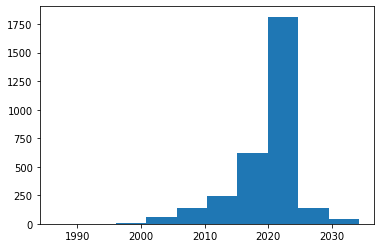

In [32]:
plt.hist(x=O['PredDecayDate'])
plt.show()

In [35]:
L = O[O.PredDecayDate > '2021-05-13 00:00:01']

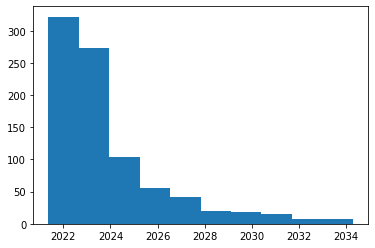

In [36]:
plt.hist(x=L['PredDecayDate'])
plt.show()

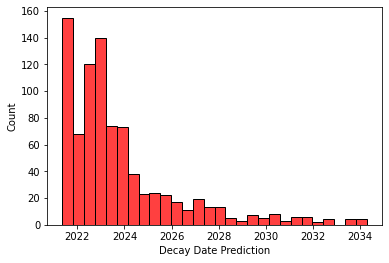

In [40]:
sns.histplot(data=L, x="PredDecayDate", color='red')
plt.xlabel ('Decay Date Prediction')
plt.show()